# Part1

import libraries

In [233]:
import numpy as np

# Plotting header
import matplotlib
import matplotlib.pyplot as plt

## Queston 1

In [234]:
a = np.array([[1, 2],
             [3, 4]])
np.savetxt('test_array.csv', a, delimiter=',')

b = np.loadtxt('test_array.csv', delimiter=',')
# Implement a code to load "test_array.csv" to varaible 'b'
# Put some code here

print(b)

[[1. 2.]
 [3. 4.]]


## Question2

In [235]:
train_data = np.loadtxt('ex1data1.txt', delimiter=',')
x = train_data[:, 0]
y = train_data[:, 1]

## Part2 : Plot Graph

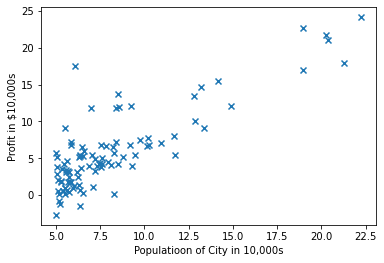

In [236]:
plt.scatter(x, y, marker='x')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Populatioon of City in 10,000s')
plt.show()

## Question3

In [237]:
def plot_data(x_data, y_data, x_title='', y_title=''):
    plt.plot(x_data, y_data)
    plt.ylabel(y_title)
    plt.xlabel(x_title)
    plt.show()

# Part3 : Linear Regression

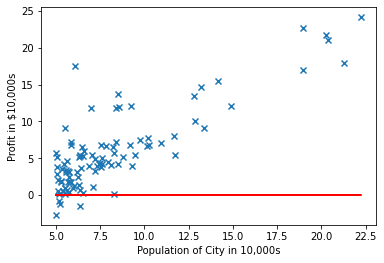

In [238]:
theta = np.zeros((2,1))
x = train_data[:, 0, np.newaxis]
y = train_data[:, 1, np.newaxis]

# insert x_0 column to x
x_0 = np.ones((x.shape[0], 1))
X = np.concatenate((x_0, x), axis=1)

plt.scatter(x, y, marker='x')  # Scatter 차트, 첫번째 인자는 x축에 해당하는 값을 의미, y축에 해당하는 값을 의미
                            # marker는 데이터를 차트에서 X로 표현
plt.plot(x, np.dot(X, theta), 'r')
plt.ylabel('Profit in $10,000s') # y축 레이블 설정
plt.xlabel('Population of City in 10,000s') # x축 레이블 설정
plt.show()

## Question 4. Cost function을 정의하세요.

In [239]:
def cost_function(theta, x, y):
    dif = np.dot(x, theta).squeeze() - y.squeeze()
    cost =  np.dot(np.transpose(dif), dif) / (2 * dif.shape[0])
    # Implement cost function
    # You need to return 'scalar value' as result, not array e.g.) 123
    return cost

In [240]:
print(cost_function(theta, X, y))

32.07273387745567


## Question 5. Gradient Descent 알고리즘을 구현하여 theta를 구하세요.

In [241]:
theta = np.zeros((2,1))
def update_func(theta, x_, y, alpha=0.01):
    dif = np.dot(x_, theta) - y
    '''
    print(x_.shape, y.shape, theta.shape, (np.dot(x_, theta) - y).shape)
    # (97, 2) (97, 1) (2, 1) (97, 1)
    print(np.dot(np.transpose(dif), x_.squeeze()).shape)
    # (1, 2)
    print(dif.shape)
    # (97, 1)
    '''
    new_theta = theta - (alpha / x_.shape[0]) * np.dot(np.transpose(x_), dif)
    return new_theta

niter = 1500
for i in range(niter):
    new_theta = update_func(theta, X, y, alpha=0.01)
    theta = new_theta

print(theta)
'''
[[-3.63029144]
 [ 1.16636235]]
 '''
print('Expected theta [-3.6303, 1.1664]')

[[-3.63029144]
 [ 1.16636235]]
Expected theta [-3.6303, 1.1664]


## Question6 :  Graident Descent 알고리즘으로 구한 모델을 아래와 같이 기존 데이터와 함께 그려, 모델이 적합한지 확인하여라

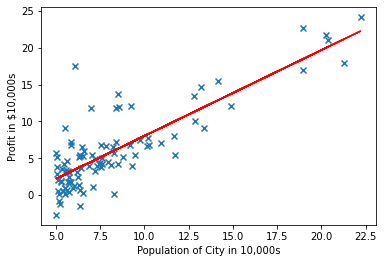

In [242]:
x = train_data[:, 0, np.newaxis]
y = train_data[:, 1, np.newaxis]

# insert x_0 column to x
x_0 = np.ones((x.shape[0], 1))
X = np.concatenate((x_0, x), axis=1)

plt.scatter(x, y, marker='x')  # Scatter 차트, 첫번째 인자는 x축에 해당하는 값을 의미, y축에 해당하는 값을 의미
                            # marker는 데이터를 차트에서 X로 표현
plt.plot(x, np.dot(X, theta), 'r')
plt.ylabel('Profit in $10,000s') # y축 레이블 설정
plt.xlabel('Population of City in 10,000s') # x축 레이블 설정
plt.show()

## Question7. 위의 graident descent 알고리즘을 사용할 때, 매 iteration에서 cost function의 변화를 그래프로 표현하세요.

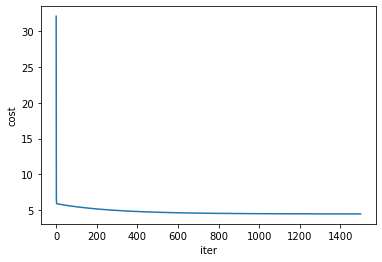

In [243]:
theta = np.zeros((2, 1))
cost_list = []
for i in range(niter):
    cost_list.append(cost_function(theta, X, y))
    theta = update_func(theta, X, y, alpha = 0.01)
plot_data(range(1500), cost_list, "iter", "cost")

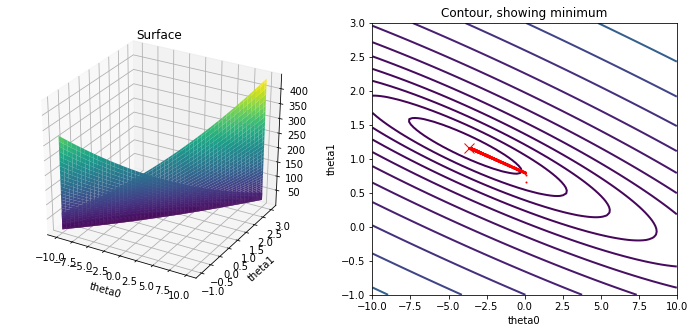

In [244]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 3, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        theta_ = np.array([[theta0, theta1]]).T
        J_vals[i, j] = cost_function(theta_, X, y)

# plot_surface 함수는 meshgrid를 사용하여, x, y 좌표를 만듭니다.
# 좌표의 기술 방식이 y, x이기 때문에 x, y array index로 배열된 J_vals를 transpose해서 사용합니다.
J_vals = J_vals.T

# surface plot
fig = plt.figure(figsize=(12, 5)) # 그림 크기 셋팅
ax = fig.add_subplot(121, projection='3d') #

ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Surface')

# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = plt.subplot(122)
plt.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 30))
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.plot(theta[0], theta[1], 'rx', ms=10, lw=2)
plt.title('Contour, showing minimum')

niter = 1500
theta = np.zeros((2,1))
for i in range(niter):
    new_theta = update_func(theta, X, y, alpha=0.01)
    theta = new_theta
    plt.plot(theta[0], theta[1], 'ro', ms=1, lw=1)
plt.show()

## Question 8. Learning rate  𝛼 를 0.1로 하였을 때, cost function의 값이 어떻게 변화하는가? 그에 대한 이유는 무엇인가?
ans) learning rate를 키우면 빠르게 수렴할 것으로 예상되었지만, 아래 contour 그래프에서 확인할 수 있듯이 theta와 cost_function의 값이 발산함을 확인할 수 있다.

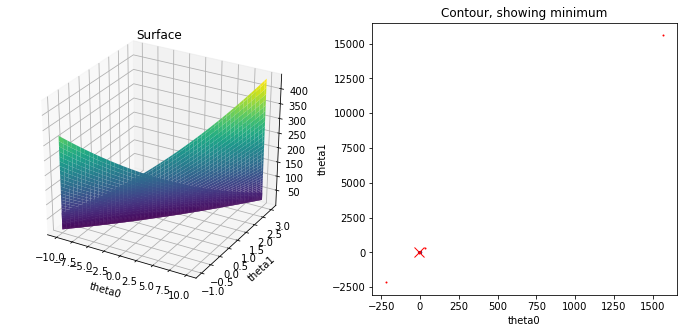

In [245]:
# This code modified from "https://github.com/dibgerge/ml-coursera-python-assignments/blob/master/Exercise1/exercise1.ipynb"
# grid over which we will calculate J
import matplotlib.pyplot as plt
import numpy as np

theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 3, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        theta_ = np.array([[theta0, theta1]]).T
        J_vals[i, j] = cost_function(theta_, X, y)

# plot_surface 함수는 meshgrid를 사용하여, x, y 좌표를 만듭니다.
# 좌표의 기술 방식이 y, x이기 때문에 x, y array index로 배열된 J_vals를 transpose해서 사용합니다.
J_vals = J_vals.T

# surface plot
fig = plt.figure(figsize=(12, 5)) # 그림 크기 셋팅
ax = fig.add_subplot(121, projection='3d') #

ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Surface')

# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = plt.subplot(122)
plt.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 30))
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.plot(theta[0], theta[1], 'rx', ms=10, lw=2)
plt.title('Contour, showing minimum')

niter = 5
theta = np.zeros((2,1))
for i in range(niter):
    new_theta = update_func(theta, X, y, alpha=0.1)
    theta = new_theta
    plt.plot(theta[0], theta[1], 'ro', ms=1, lw=1)

## Question 9. Normal equation을 구현하라

In [246]:
def compute_normal_eq(x, y):
    theta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(x), x)), np.transpose(x)), y)
    return theta
print(compute_normal_eq(X, y))

[[-3.89578088]
 [ 1.19303364]]


## Question 10. Normal equation과 gradient descent의 실행시간?

In [247]:
def gradient_descent_iter(theta, x, y):
        # put some code here
        n_iter = 1500
        for _ in range(n_iter):
            new_theta = update_func(theta, x, y, alpha=0.01)
            theta = new_theta
        return theta
def compare_time(n_features, m):
    X = np.random.random((m, n_features))
    y = np.random.random((m, 1))
    theta = np.zeros((n_features, 1))
    # Normal equation
    print("Normal Equation n_features : {}, m : {}".format(n_features, m))
    %time compute_normal_eq(X, y)
    # gradient_descent
    print("Gradient Descent n_features : {}, m : {}".format(n_features, m))
    %time gradient_descent_iter(theta, X, y)

compare_time(1, 100)
compare_time(10, 100)
compare_time(100, 100)
compare_time(1000, 100)
compare_time(10000, 100)

Normal Equation n_features : 1, m : 100
Wall time: 997 µs
Gradient Descent n_features : 1, m : 100
Wall time: 7.98 ms
Normal Equation n_features : 10, m : 100
Wall time: 0 ns
Gradient Descent n_features : 10, m : 100
Wall time: 8.98 ms
Normal Equation n_features : 100, m : 100
Wall time: 0 ns
Gradient Descent n_features : 100, m : 100
Wall time: 15 ms
Normal Equation n_features : 1000, m : 100
Wall time: 34.9 ms
Gradient Descent n_features : 1000, m : 100
Wall time: 38.9 ms
Normal Equation n_features : 10000, m : 100
Wall time: 12.9 s
Gradient Descent n_features : 10000, m : 100
Wall time: 244 ms


<ipython-input-241-cc9e87cd3c9c>:12: RuntimeWarning: invalid value encountered in subtract
  new_theta = theta - (alpha / x_.shape[0]) * np.dot(np.transpose(x_), dif)


## Question 11.Linear regression with multiple features

In [248]:
from scipy.stats import norm
def feature_normalize(x):
    # Need to implement this
    mu, sigma = norm.fit(x) 
    norm_x = (x - mu)/sigma
    return norm_x, mu, sigma

# Hypothesis에서 prediction 할 때, 새로운 데이터를 mu, sigma로 normalize한 후 사용해야 함.

In [249]:
train_data = np.loadtxt('ex1data2.txt', delimiter=',')
x1= train_data[:, 0, np.newaxis]
x2= train_data[:, 1, np.newaxis]
y = train_data[:, 2, np.newaxis]

In [250]:
x1, mu_1, sigma_1 = feature_normalize(x1)
x2, mu_2, sigma_2 = feature_normalize(x2)
print(mu_1, sigma_1)
print(mu_2, sigma_2)
x1.shape

2000.6808510638298 786.2026187430467
3.1702127659574466 0.7528428090618781


(47, 1)

In [251]:
theta = np.zeros((3, 1))
x_0 = np.ones((x1.shape[0], 1))
print(x_0.shape)
X = np.concatenate((x_0, x1, x2), axis = 1)
print(X.shape)

(47, 1)
(47, 3)


In [252]:
cost_function(theta, X, y)

65591548106.45744

In [253]:
theta = gradient_descent_iter(theta, X, y)
print(theta)
print(cost_function(theta, X, y))

[[340412.56301439]
 [109370.05670466]
 [ -6500.61509507]]
2043282709.9327548


In [254]:
cost_function(theta, X, y)


2043282709.9327548

In [16]:
theta = gradient_descent_iter(theta, X, y)
print(theta)
print(cost_function(theta, X, y))

In [17]:
x1, mu_1, sigma_1 = feature_normalize(x1)
x2, mu_2, sigma_2 = feature_normalize(x2)
print(mu_1, sigma_1)
print(mu_2, sigma_2)
x1.shape

2000.6808510638298 786.2026187430467
3.1702127659574466 0.7528428090618781


(47, 1)

In [18]:
theta = np.zeros((3, 1))
x_0 = np.ones((x1.shape[0], 1))
print(x_0.shape)
X = np.concatenate((x_0, x1, x2), axis = 1)
print(X.shape)

(47, 1)
(47, 3)


In [19]:
cost_function(theta, X, y)

65591548106.45744

In [24]:
theta = gradient_descent_iter(theta, X, y)
print(theta)
print(cost_function(theta, X, y))

[[0.41043921]
 [0.33483676]]
0.05653782877966064
